In [61]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
import os
os.getcwd()

'C:\\Users\\am253'

In [63]:
train = pd.read_excel(r"C:\Users\am253\Documents\Data_Train.xlsx")
test = pd.read_excel(r"C:\Users\am253\Documents\Data_Test.xlsx")

In [64]:
train.shape,test.shape

((12690, 9), (4231, 8))

In [65]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [67]:
for i in train.columns:
    print("Unique value in",i,train[i].nunique())

Unique value in TITLE 112
Unique value in RESTAURANT_ID 11892
Unique value in CUISINES 4155
Unique value in TIME 2689
Unique value in CITY 359
Unique value in LOCALITY 1416
Unique value in RATING 32
Unique value in VOTES 1847
Unique value in COST 86


In [68]:
train['COST'].describe()


count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

[Text(0.5, 1.0, 'Box Plot for COST variable')]

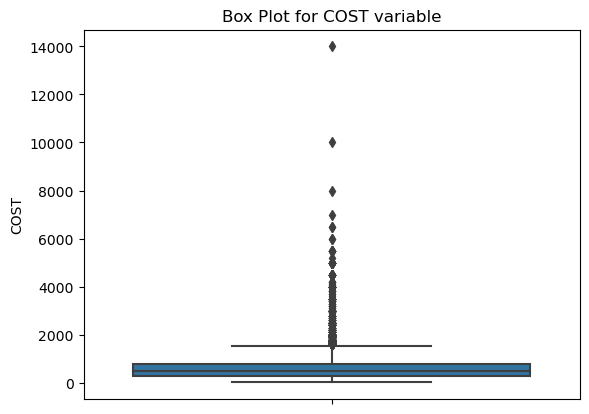

In [69]:
sns.boxplot(y = train['COST']).set(title="Box Plot for COST variable")

In [70]:
for i in range(90,100,1):
  print(i,"th percentile :",np.percentile(train['COST'],i).round(3))

90 th percentile : 1400.0
91 th percentile : 1500.0
92 th percentile : 1500.0
93 th percentile : 1500.0
94 th percentile : 1600.0
95 th percentile : 1800.0
96 th percentile : 2000.0
97 th percentile : 2100.0
98 th percentile : 2500.0
99 th percentile : 3000.0


Training set :
CUISINES
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European, North Indian      1
Cafe, Continental, Italian, Lebanese            1
Finger Food, Continental, Asian, Chinese        1
Name: count, Length: 4155, dtype: int64
-------------
Testing set :
CUISINES
North Indian, Chinese                                 213
North Indian                                          190
South Indian                                          174
Fast Food                                              78
Chinese                                                59
                                                     ... 
S

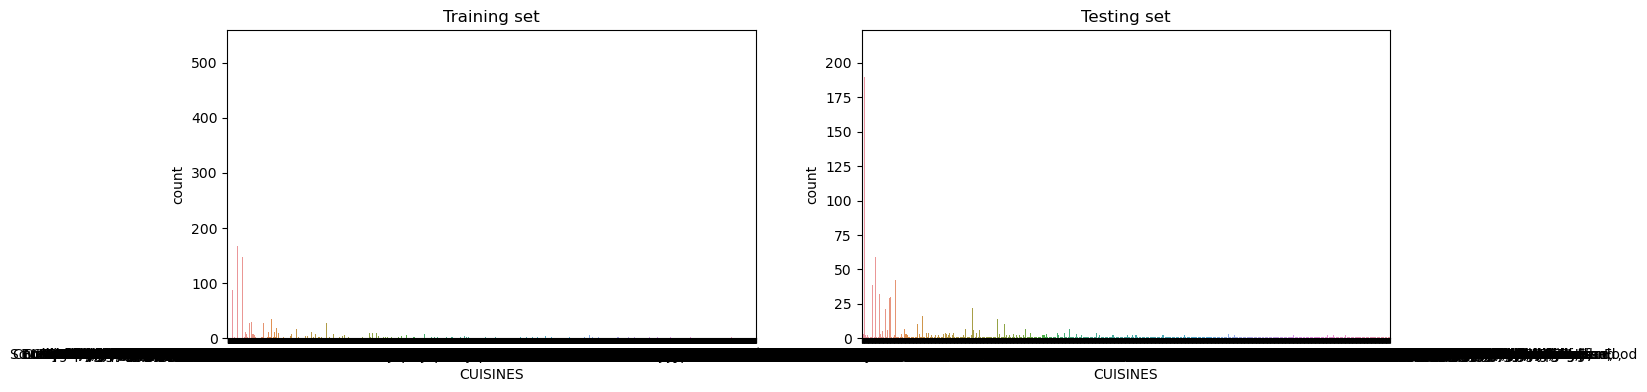

In [75]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['CUISINES'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['CUISINES'].value_counts())

sns.countplot(x=test['CUISINES'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['CUISINES'].value_counts())
     


Analyzing 'City' column



Text(0.5, 1.0, 'Countplot for CITY - Training set')

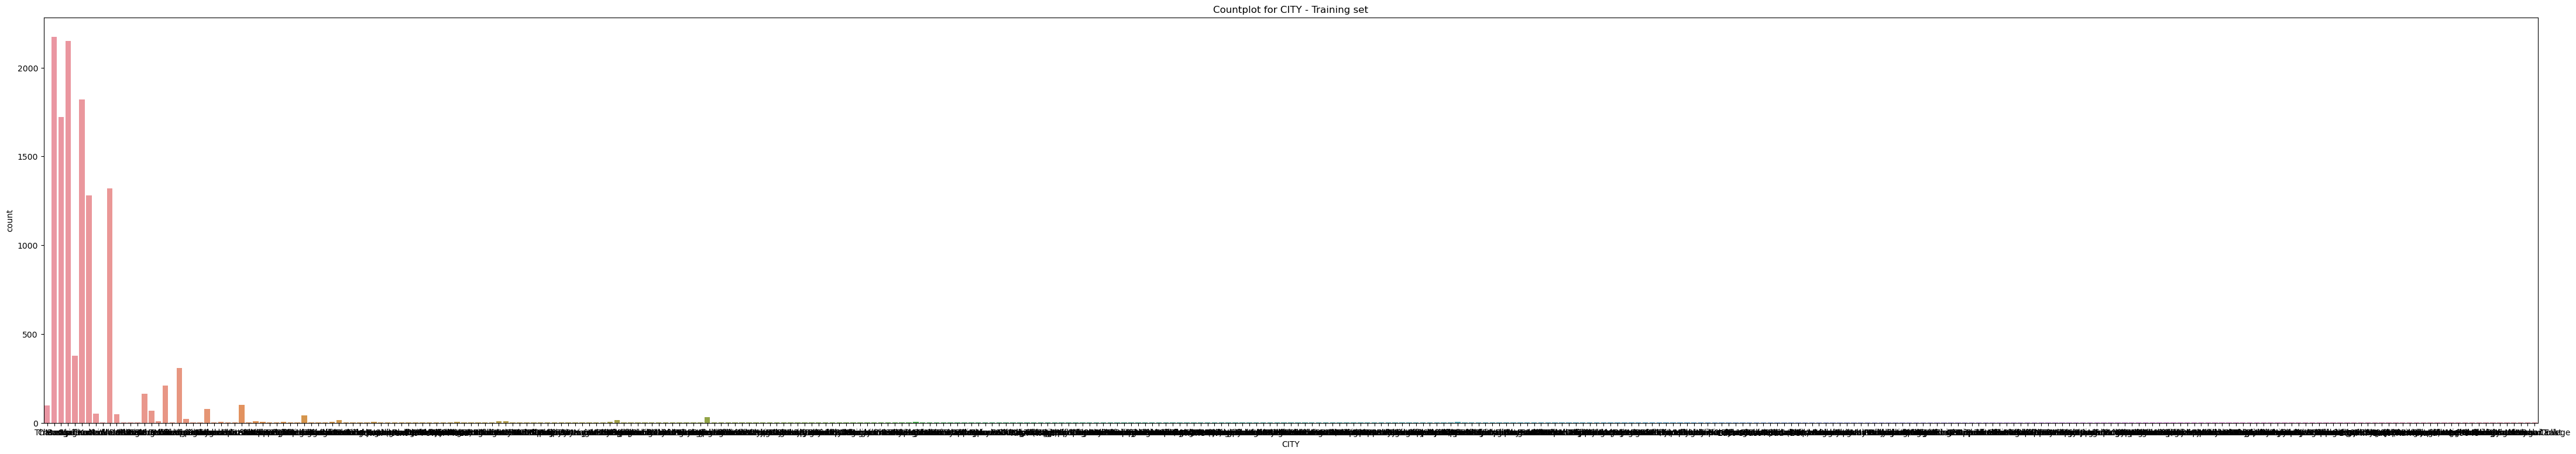

In [79]:
plt.figure(figsize=(55,9))
sns.countplot(x=train['CITY']).set_title("Countplot for CITY - Training set") 

Text(0.5, 1.0, 'Countplot for City - Testing set')

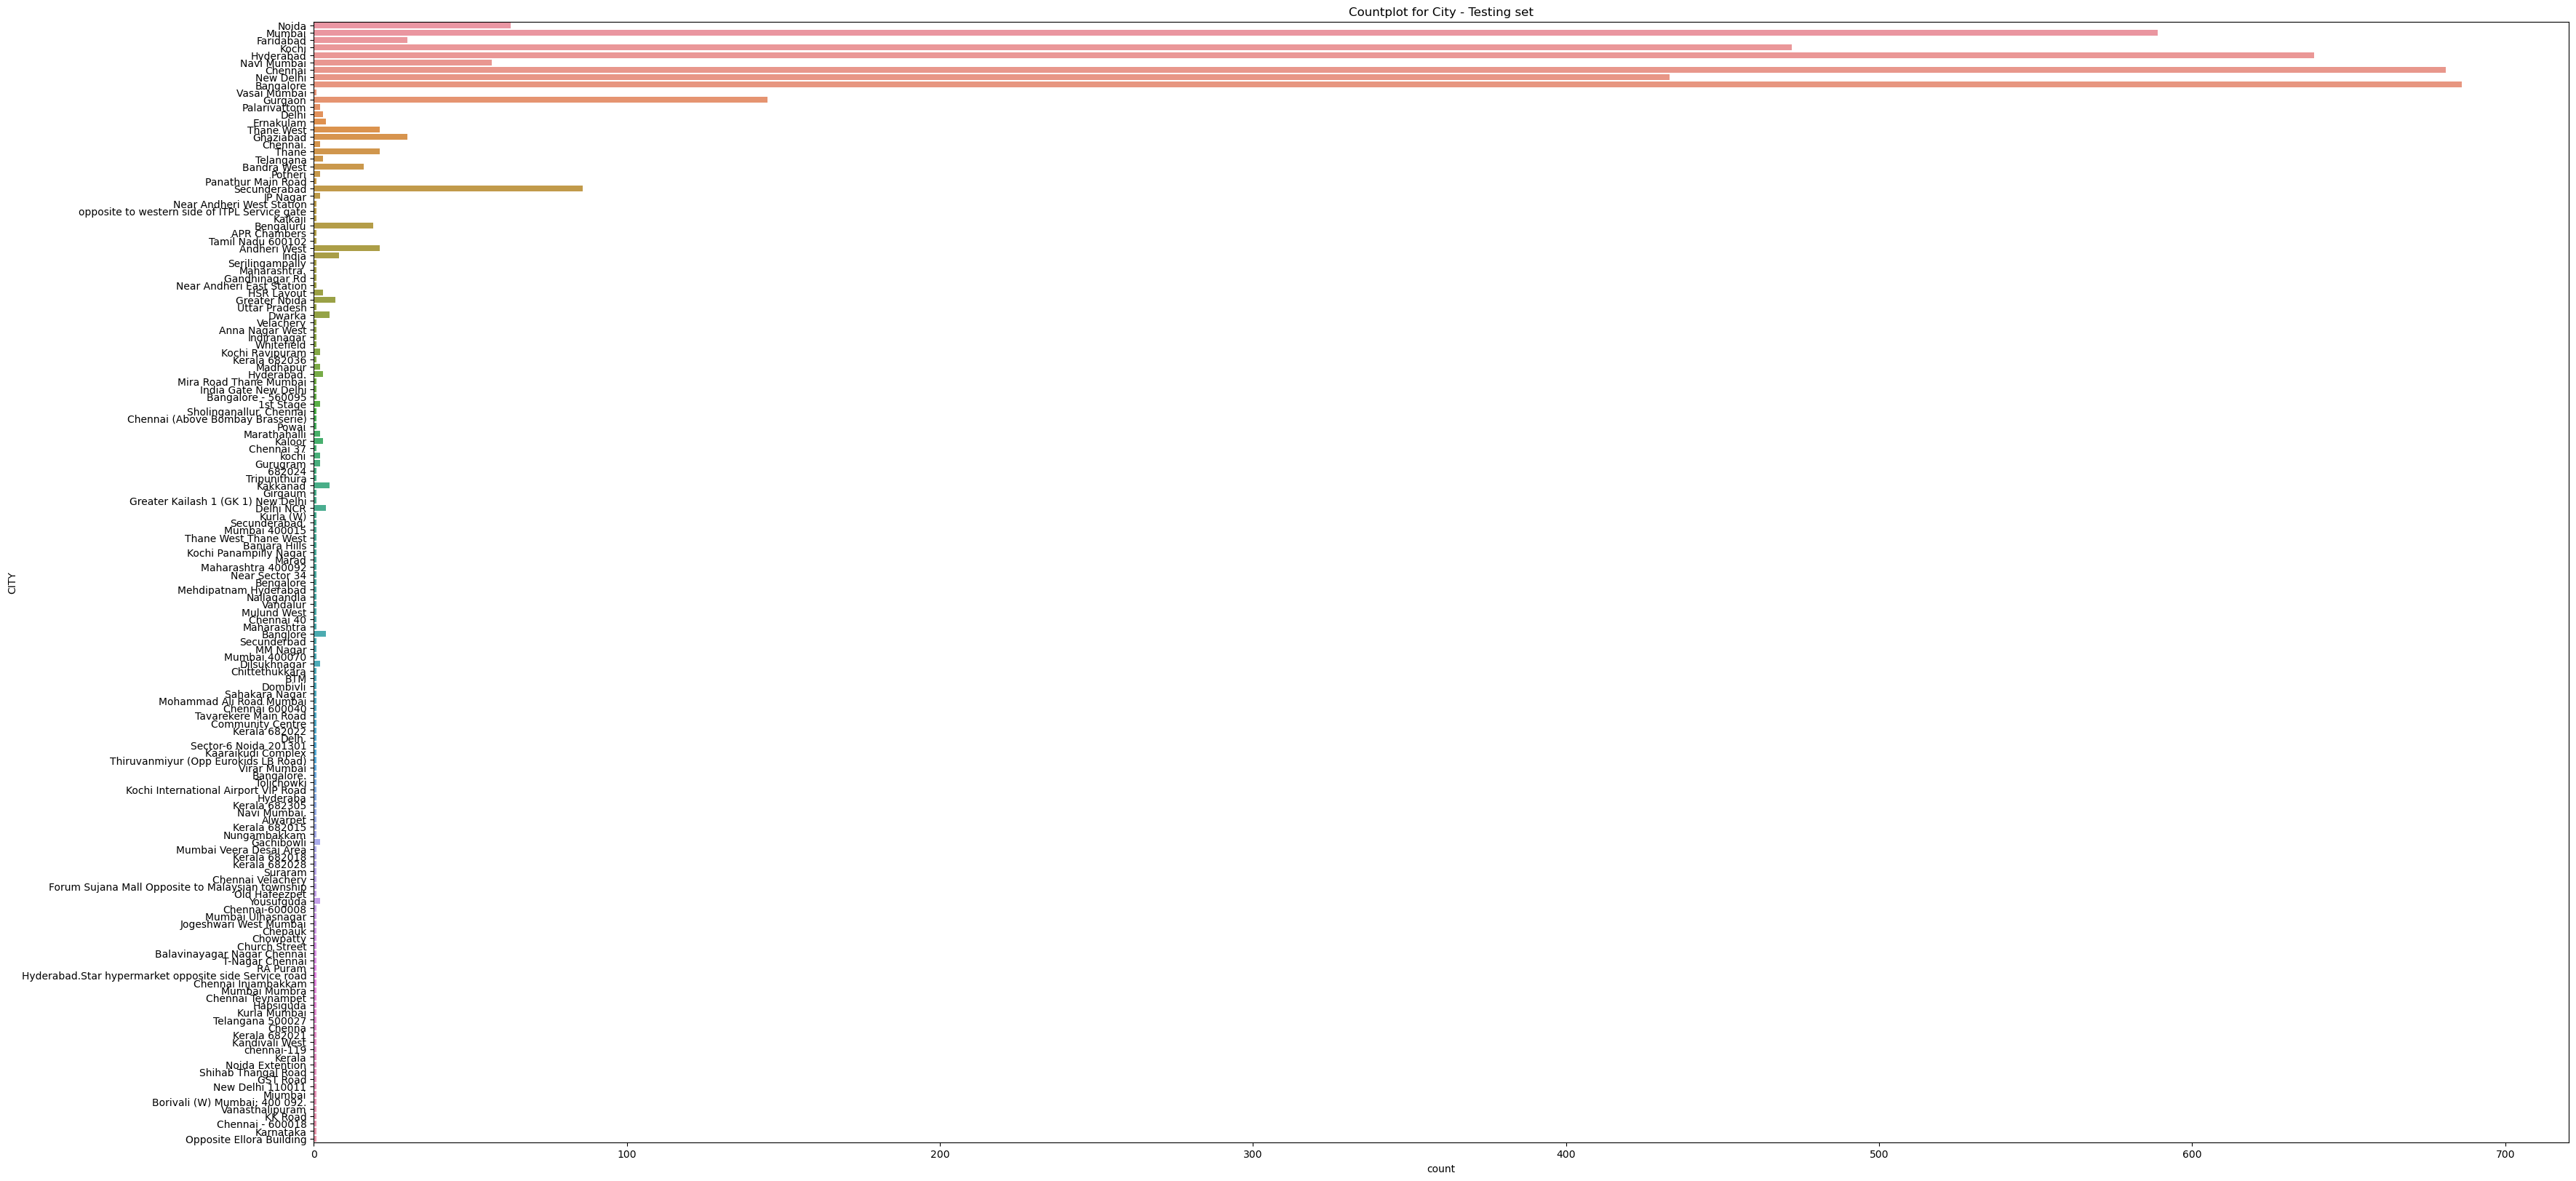

In [81]:
plt.figure(figsize=(40,20))
sns.countplot(y=test['CITY']).set_title("Countplot for City - Testing set")

In [82]:
print("Number of cities in training set :",train['CITY'].nunique())
print("Number of cities in testing set :",test['CITY'].nunique())

Number of cities in training set : 359
Number of cities in testing set : 151


In [83]:
counts = train['CITY'].value_counts() 
percent = ((train['CITY'].value_counts()/train['CITY'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
CITY,,
Chennai,2174,17.3%
Bangalore,2149,17.1%
Hyderabad,1819,14.5%
Mumbai,1722,13.7%
New Delhi,1321,10.5%


In [3]:
import pandas as pd
train = pd.read_excel(r"C:\Users\am253\Documents\Data_Train.xlsx")
test = pd.read_excel(r"C:\Users\am253\Documents\Data_Test.xlsx")

In [4]:
counts = test['CITY'].value_counts()
percent = ((test['CITY'].value_counts()/test['CITY'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
CITY,,
Bangalore,686,16.3%
Chennai,681,16.2%
Hyderabad,639,15.2%
Mumbai,589,14.0%
Kochi,472,11.2%


Analyzing RATING



Text(0.5, 1.0, 'RATING vs COST')

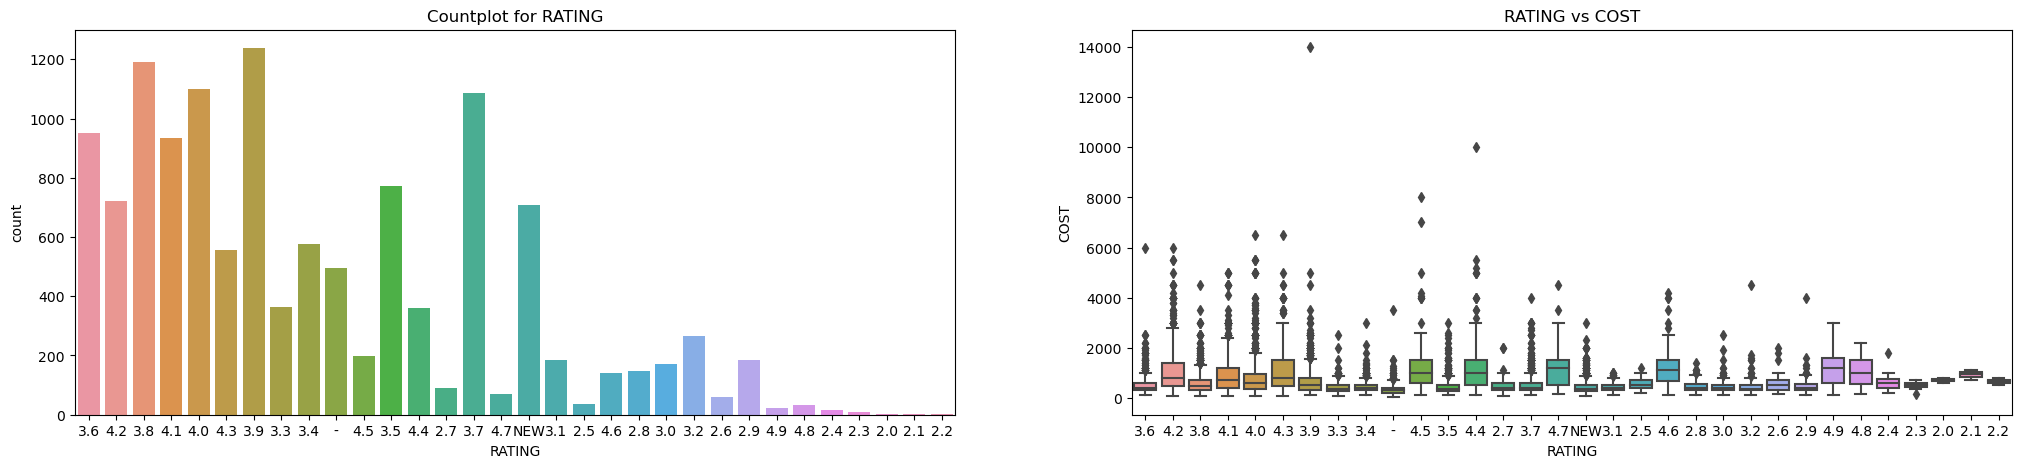

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(25,5))   
sns.countplot(x=train['RATING'],ax=ax[0])
ax[0].set_title("Countplot for RATING")

sns.boxplot(y=train['COST'],x=train['RATING'],ax=ax[1]).set_title("RATING vs COST")

C:\Users\am253\AppData\Local\Temp\ipykernel_19060\943552374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train['COST'])


Text(0.5, 1.0, 'Distribution plot for COST')

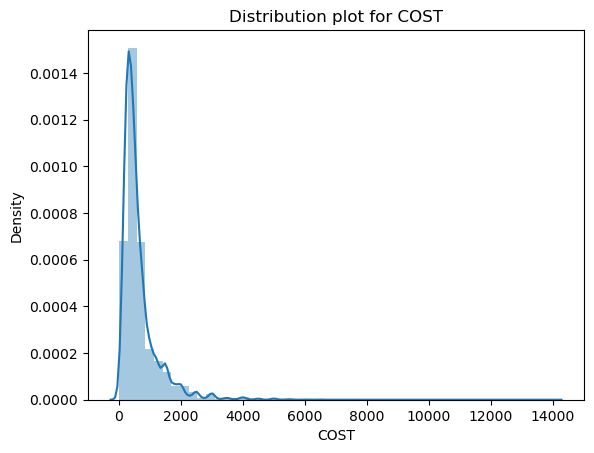

In [9]:
ax = sns.distplot(train['COST'])
ax.set_title("Distribution plot for COST") 
     

In [23]:
print(x_train.shape,' ',x_test.shape)


(12690, 7)   (4231, 7)
